# Import packages

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns                                                   

# Import files
Import test and train files
drop unnamed columns


In [6]:
path_train = "C:\\CSE\\Logistic_regression\\Gotem Pumpkins.csv"
path_test="C:\\CSE\\Logistic_regression\\Freyja_Pumpkins.csv"
train_file = pd.read_csv(path_train)
test_file = pd.read_csv(path_test)


# Drop unnecessary columns 
train_file = train_file.drop(columns=["Unnamed: 0"], errors="ignore")
test_file = test_file.drop(columns=["Unnamed: 0"], errors="ignore")
train_file


,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,84930,1204.448,508.7883,213.0266,85665,328.8407,0.9081,0.9914,0.5482,0.7357,2.3884,0.6463,Ürgüp Sivrisi
1,103343,1275.261,521.4694,252.8941,104156,362.7401,0.8745,0.9922,0.7457,0.7985,2.0620,0.6956,Ürgüp Sivrisi
2,98350,1269.539,526.2346,238.4702,99184,353.8688,0.8914,0.9916,0.5919,0.7668,2.2067,0.6725,Ürgüp Sivrisi
3,69517,1059.538,429.8407,206.8250,70493,297.5093,0.8766,0.9862,0.6623,0.7782,2.0783,0.6921,Çerçevelik
4,80011,1182.947,501.9065,204.7531,80902,319.1758,0.9130,0.9890,0.7374,0.7185,2.4513,0.6359,Ürgüp Sivrisi
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,68292,982.052,368.6867,237.1654,68891,294.8764,0.7656,0.9913,0.7212,0.8898,1.5546,0.7998,Çerçevelik
1996,82272,1121.769,459.4482,228.2780,82865,323.6541,0.8678,0.9928,0.7321,0.8216,2.0127,0.7044,Ürgüp Sivrisi
1997,72049,1023.784,398.3945,230.5932,72732,302.8789,0.8155,0.9906,0.7638,0.8638,1.7277,0.7602,Çerçevelik
1998,73703,1065.980,422.3591,223.3923,74461,306.3357,0.8487,0.9898,0.6380,0.8151,1.8907,0.7253,Çerçevelik


# Categorize
As there are two types of pumpkin categorise them into two types one represented by 1 and other 0.


In [7]:
train_file = pd.get_dummies(train_file,'Class',drop_first=True)
test_file = pd.get_dummies(test_file,'Class',drop_first=True)
Class = "Class_Ürgüp Sivrisi"
train_file[Class] = train_file[Class].astype(int)
test_file[Class] = test_file[Class].astype(int)

# Correlation
It can be seen Convex_Area,Major_Axis_Length, Equiv_Diameter, Compactness, Perimeter have high corelation with Area so they can be dropped. 
while Aspect_Ration has low correlation with Class so it can be dropped

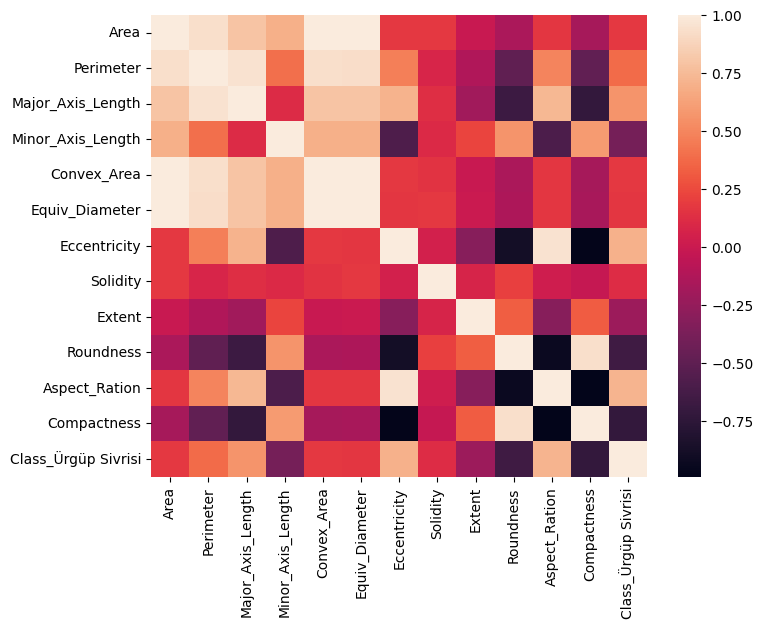

In [8]:
numeric_columns = train_file.select_dtypes(include=[np.number]).columns
numeric_columns = train_file.columns
train_file_numeric = train_file[numeric_columns]


# Calculate the correlation matrix
correlation_matrix = train_file_numeric.corr()
plt.figure(figsize=(8, 6))  # Adjust the size of the plot
sns.heatmap(correlation_matrix)
plt.show()

# Drop irrelevant columns
after dropping irrelevant column save features in X_train as a 2D array where columns correspond to feature.
convert all datatype to Float to avoid error and loss of data during calculations and scale down.


In [9]:
columns_to_drop = ['Convex_Area','Equiv_Diameter','Compactness','Class_Ürgüp Sivrisi','Perimeter','Aspect_Ration','Major_Axis_Length']
columns = train_file.columns
columns = [item for item in columns if item not in columns_to_drop]

# Define the target column
y_columns = Class
x_columns = columns
print(f"Y = {y_columns}")
print(f"Features retained = {x_columns}")

x_train = train_file[x_columns].values        #store features as array of n dimension(n = number of feature)
y_train = train_file[y_columns].values
x_test = test_file[x_columns].values        
y_test = test_file[y_columns].values

x_train = x_train.astype(float)
y_train = y_train.astype(float)
x_test = x_test.astype(float)
y_test = y_test.astype(float)

Y = Class_Ürgüp Sivrisi
Features retained = ['Area', 'Minor_Axis_Length', 'Eccentricity', 'Solidity', 'Extent', 'Roundness']


# Scale down using Z score scaling 
-> X = (X - Mean(X))/ standard deviation(X)
scale down both test and train data for uniformity.
No need to scale down y_train and y_test as they need to retain binary values


In [10]:
m = x_train.shape[1]
for i in range(m):      
 x_train[:,i] = (x_train[:,i] - np.mean(x_train[:,i]))/np.std(x_train[:,i])
 
m = x_test.shape[1]
for i in range(m):  
 x_test[:,i] = (x_test[:,i] - np.mean(x_test[:,i]))/np.std(x_test[:,i])

## Initialize values

In [11]:
#initialise  {initialise w to zero array with elements equal to number of features..ie. column}
m = x_train.shape[1]
w = np.zeros(m)
b = 0
a = 0.001
ite = 1000

# Define Functions
## Linear function
defined as F = w*x + b 
## Sigmoid function
defined as f = 1/(1+e^-z)

In [12]:
def function(w,b,x):
    f = np.dot(x,w)+b
    return f

def sigmoid_function(z):
    z = np.clip(z, -500, 500) 
    return 1/(1+np.exp(-z))

## Cost function
using the simplified expression
## Gradient Descent 
dot product used to decrease time taken

In [13]:
def cost_function(w,b,x,y):
    n = len(y)
    sum = 0
    for i in range(n):
        z= function(w,b,x[i])
        sum = np.sum(y[i]*np.log(sigmoid_function(z)) + (1-y[i])*np.log(sigmoid_function(z)))
    return (-1/n)* sum


def gradient_descent(w, b, x, y, a, iteration):   
    cost_his = []
    for j in range(iteration):
        dj_dw = np.zeros_like(w)  # Initialize gradient for w
        dj_db = 0  # Initialize gradient for b
        
        z = function(w,b,x)
        F = sigmoid_function(z)
        dj_dw += np.dot((F - y),x)  
        dj_db = np.sum(F - y)
      
        w = w - (1/m) * a * dj_dw
        b = b - (1/m) * a * dj_db
              
    
    
    return w, b


In [14]:
# Run gradient descent aldorithm for ite no of iterations 
w, b = gradient_descent(w, b, x_train, y_train, a, ite)

# Final output
print("\nOUTPUT\n")
print(f"Final cost = {cost_function(w,b,x_train,y_train)}")
print(f"Final value of Weights = {w},\nBias = {b}\nLearning Rate = {a}\nItirations = {ite}")


OUTPUT

Final cost = 0.00017588994106912943
Final value of Weights = [ 1.15954138 -1.28499619  1.4036612   0.53789333  0.08054157 -0.73560344],
Bias = -0.11622179601549397
Learning Rate = 0.001
Itirations = 1000


# Accuracy of model
Find accuracy of model against test and train data. Pridiction will be 1 if sigmoid function has value grater than 0.5. Kepping 0.5 as refernce line 

In [15]:
def prediction(probabality):
    return np.where(probabality>= 0.5,1,0)

def accuracy(w,b,x,y):
    n = len(y)
    pred = prediction(sigmoid_function(function(w,b,x)))
    correct =0
    for i in range(n):
        if pred[i] == y[i]:
            correct+=1
    return 100*correct/n

In [16]:

print(f"Accuracy of model for train data= {accuracy(w,b,x_train,y_train)} %")

print(f"accuracy of model for test data = {accuracy(w,b,x_test,y_test)} %")


Accuracy of model for train data= 86.7 %
accuracy of model for test data = 89.0 %
